# <center>Численное решение</center>

## Алгоритм градиентного спуска

**Градиентный спуск (Gradient descent)** — самый используемый алгоритм минимизации функции потерь. Он применяется почти в каждой модели машинного обучения и является наиболее простым в реализации из всех методов численной оптимизации.

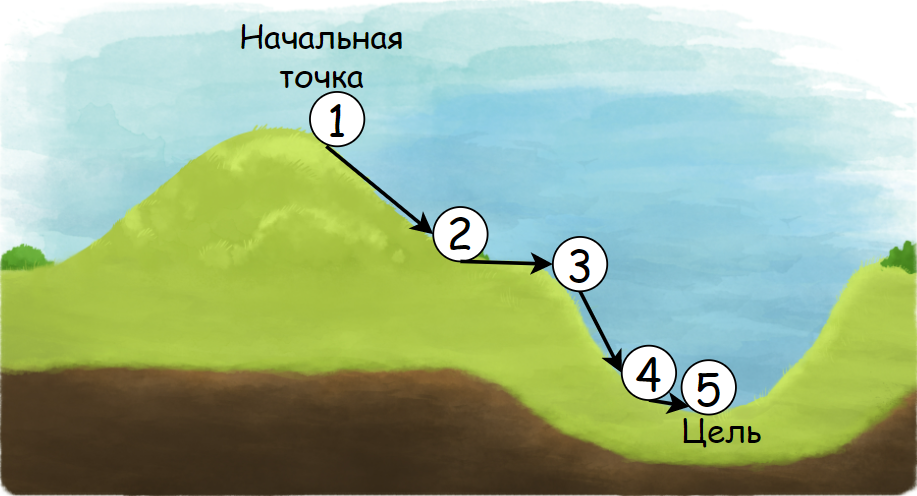

> Наша функция потерь, которая зависит от параметров модели, — это аналогия ландшафта местности. Пространство, в котором находится ландшафт, — это пространство параметров  нашей модели. То есть это система координат, в которой по осям отложены все возможные значения параметров.

В двумерном случае, когда есть только один параметр, от которого зависит функция потерь, можно построить график функции потерь. Например, для MSE, зависящей от одного параметра, график будет иметь вид параболы:

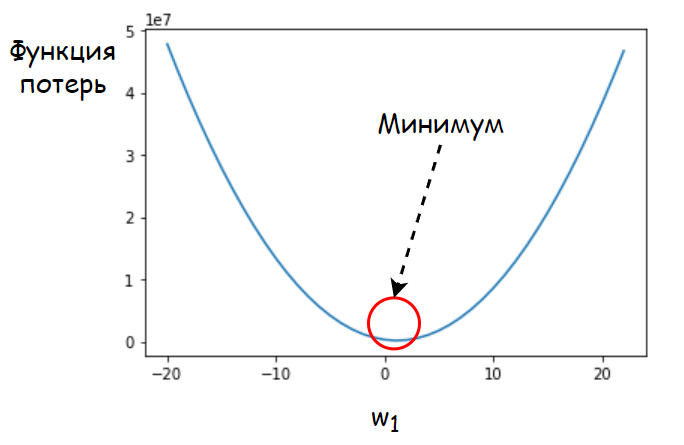

Если параметров не один, а два, то функция потерь будет графически представлена в виде поверхности в трёхмерном пространстве. Ниже приведён пример такой поверхности и её вид сверху в виде концентрических кругов:

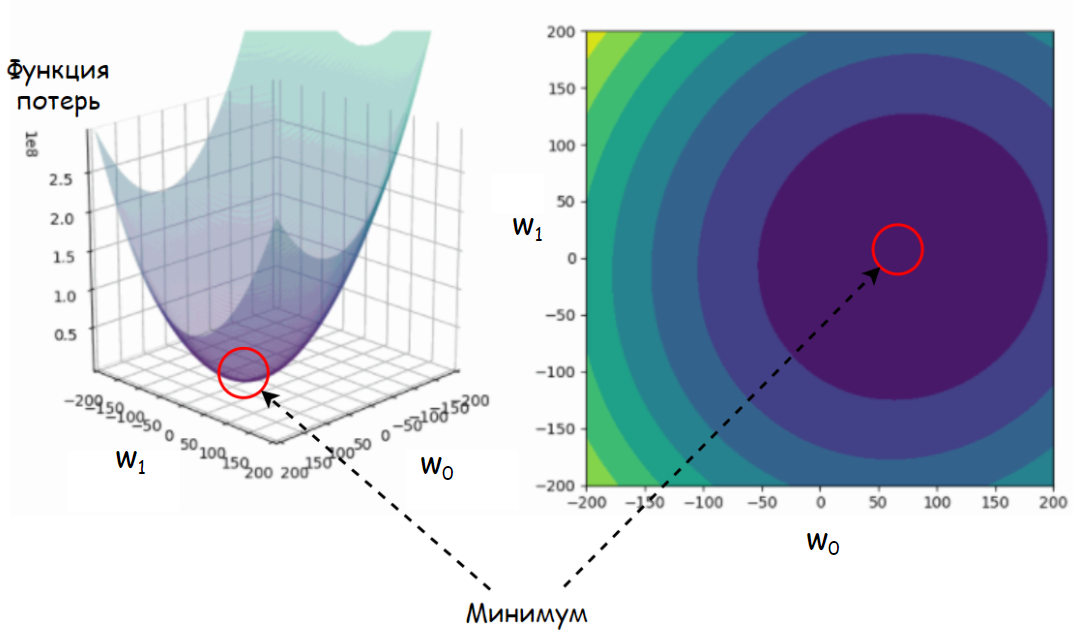

Для линейной регрессии необходимо найти в этом пространстве такие координаты $w_0, w_1, w_2 \dots w_m$, в которых находится минимум функции потерь.

>Математически **градиент** — это вектор, который состоит из частных производных по параметрам функции и записывается следующим образом:

$$ \nabla L(w) = \bigg( \frac{\partial L(w)}{\partial w_0}, \frac{\partial L(w)}{\partial w_1}, \frac{\partial L(w)}{\partial w_2}, \dots, \frac{\partial L(w)}{\partial w_m} \bigg) $$

где $L(w)$ — функция потерь, зависящая от параметров модели, функция может быть любой (например, MSE). $\nabla$ — символ набла — символьное сокращение градиента, читается как «градиент функции $L(w)$». 

>**Градиент** — это вектор, который показывает направление наискорейшего роста функции, а его длина — это само значение скорости функции в точке.

Если вновь обратиться к примеру с холмами, градиент показывает, с какой скоростью и в каком направлении нужно двигаться из текущей точки, чтобы достичь более высшей точки.

>Если поставить перед градиентом знак минус $-\nabla L(w)$, то мы получим вектор **антиградиента**, который показывает в сторону наискорейшего убывания функции потерь.

В случае одного параметра:

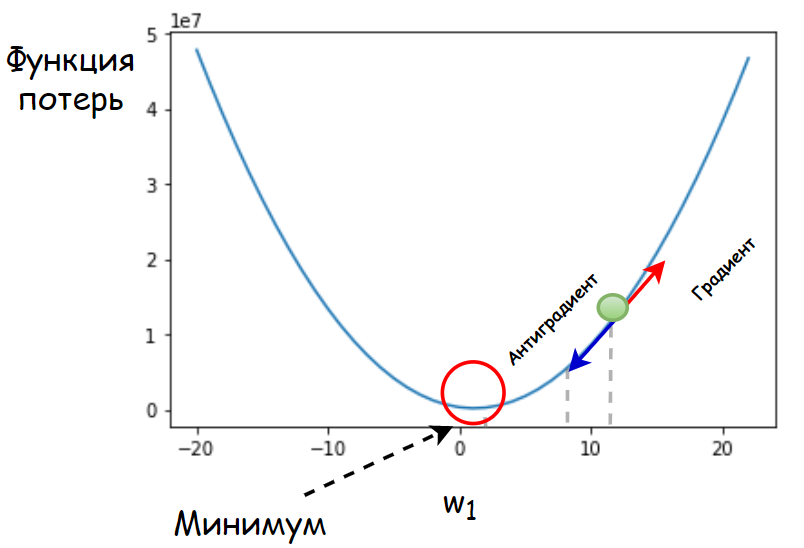

В случае двух параметров:

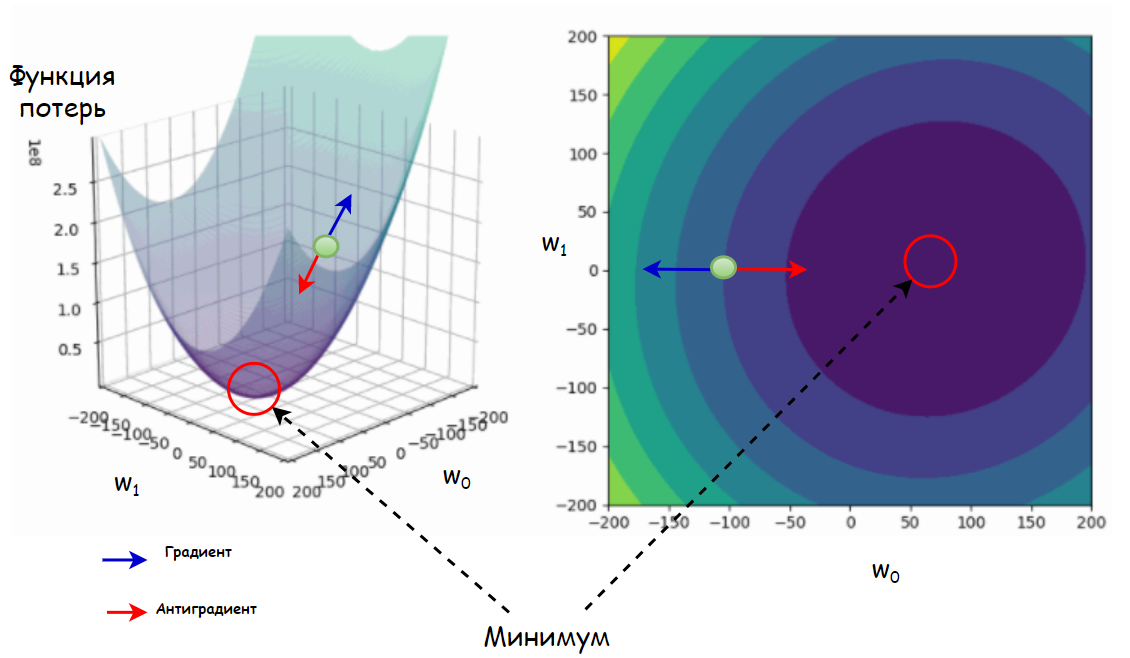

Формально это записывается следующим образом:

$$ w^{(k+1)} = w^{(k)} - \eta \nabla L(w^{(k)}) $$

где $w$ - это вектор параметров модели, координаты в пространстве, а индекс в круглых скобках сверху означает номер точки в пространстве. Запись $\nabla L(w^{(k)})$ означает, что градиент вычисляется в текущей точке под номером $k$.

Согласно приведённой формуле, новая координата $w^{(k+1)}$ в пространстве параметров определяется как текущая координата $w^{(k)}$ минус скорость роста в текущей точке $\nabla L(w^{(k)})$, помноженная на коэффициент «скольжения».

$\eta$ ("эта") - поправочный коэффициент, который носит название **темп обучения (learning rate)**.

>**Темп обучения** — это основной параметр алгоритма. Он определяет то, насколько сильно мы будем двигать точку. В аналогии с нашим примером с движением по холмам можно сказать, что это коэффициент, обратный сопротивлению ландшафта, по которому мы движемся.

Управляя данным параметром (уменьшая и увеличивая его), мы управляем скоростью движения к точке минимума. Чем больше темп обучения, тем длиннее наши шаги и тем быстрее мы движемся, и наоборот.

>Темп обучения является примером внешнего параметра алгоритма, которым может управлять пользователь. Такие параметры ещё называют **гиперпараметрами**.

Есть ещё одно важное свойство градиента: теоретически в точке минимума длина вектора равна 0, то есть движения не происходит. Это свойство мы можем использовать в качестве критерия остановки нашего алгоритма.

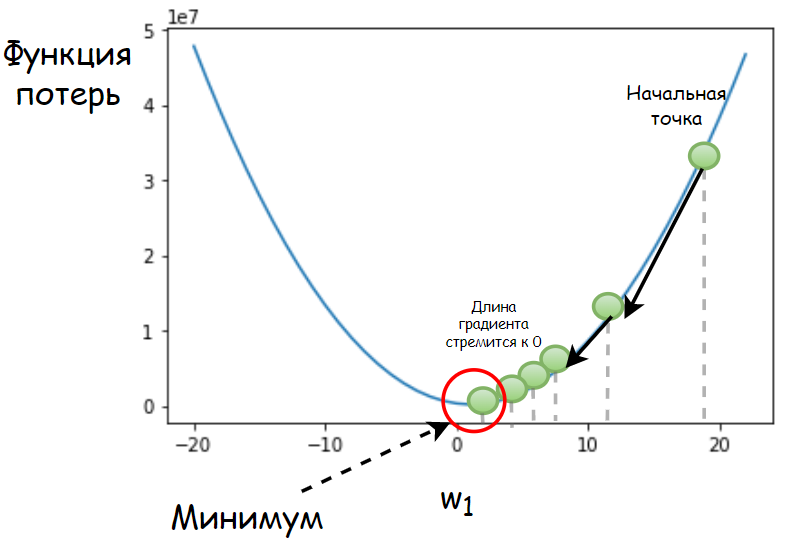

Алгоритм градиентного спуска для такой модели будет выглядеть следующим образом: 

1. Проинициализировать значения параметров $w_0$, $w_1$.
2. Повторять до тех пор, пока длина градиента не приблизится к 0.
    * Вычислить градиент функции потерь $\nabla L(w)$.
    * Обновить параметры модели, сдвинув их в сторону антиградиента.

Анимация работы градиентного спуска для двух параметров:

![](https://baptiste-monpezat.github.io/4e5a14da749976ec2770eaded04098d4/gradient_descent.gif)

А как будет меняться само уравнение прямой при минимизации функции ошибок? Коэффициенты прямой будут адаптироваться под зависимость в данных и приближаться к оптимальным значениям. В анимации это будет выглядеть следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/8c7ab69cf4bbdff33c8c2844be1ec0bf/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml2-4_8.gif)

Главное требование к функции потерь — это её гладкость во всех точках.

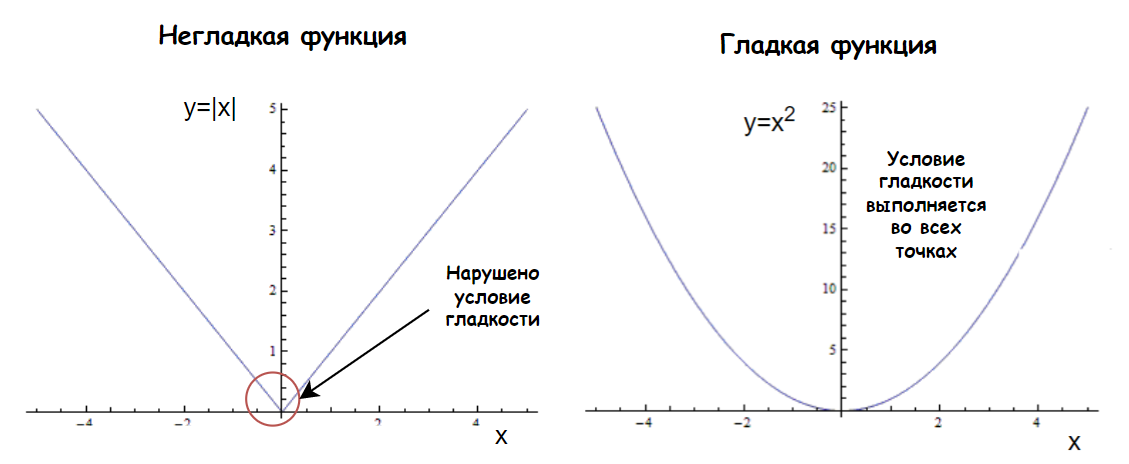

Благодаря своей простоте алгоритм обладает минимальной вычислительной сложностью и работает быстрее, чем метод наименьших квадратов, даже на огромных наборах данных с тысячами признаков.

><font color=lightpink>Однако у градиентного спуска есть одна большая проблема — это сходимость алгоритма к точке истинного минимума. Алгоритм может попросту не сойтись к истинному минимуму.</font>

Сходимость зависит от многих факторов, главные из которых:

* сложности зависимости и сложности функции потерь;
* выбранный темп обучения;
* выбранная начальная точка (инициализация параметров);
* масштабирование признаков.

Из-за сложной зависимости и сложности самой функции потерь она может иметь несколько видов минимумов: локальные и глобальные.

>**Локальный минимум** — это минимум на какой-то локальной области. 

>**Глобальный минимум** — это минимум на всей области определения функции (на всём ландшафте).

Когда мы говорим о функции потерь, нас интересует именно глобальный минимум, то есть тот минимум, которого вообще возможно достичь при управлении параметрами.

Функция потерь с локальным и глобальным минимумом в случае одного параметра:

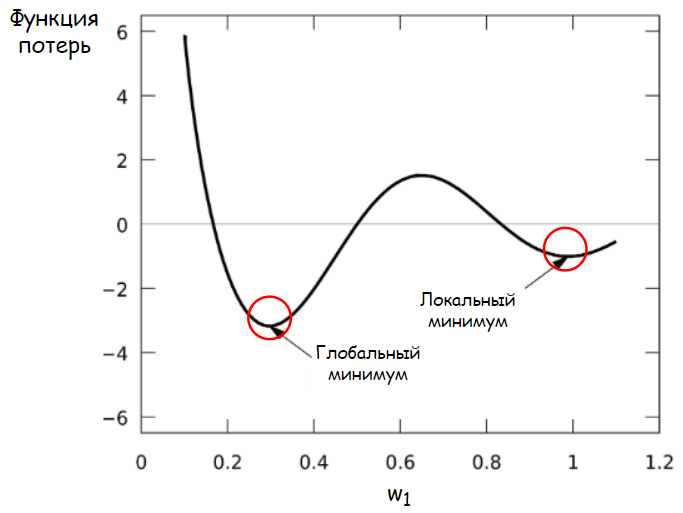

Функция потерь с локальным и глобальным минимумом в случае двух параметров:

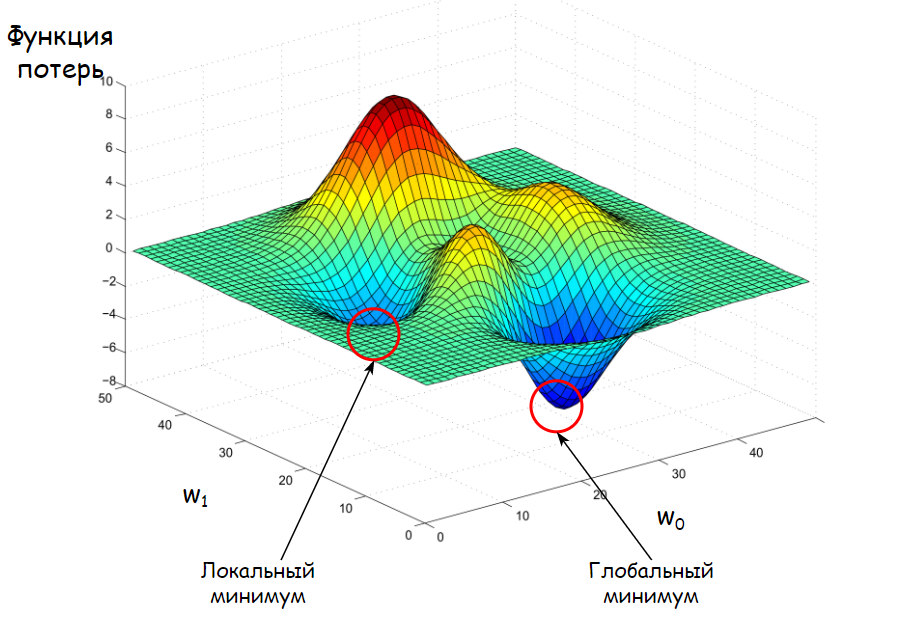

><font color=lightpink>Проблема градиентного спуска заключается в том, что алгоритм может «застрять» в локальном минимуме и не выйти из него.
Застряв в локальном минимуме, мы не найдем настоящие оптимальные значения параметров.</font>

Чтобы частично решить эту проблему используется не классический градиентный спуск, а его модификации.

В этом модуле мы будем использовать **стохастический градиентный спуск (Stochastic Gradient Descent, SGD)**. 

> Стохастическая модификация предполагает, что один шаг градиентного спуска производится на основе градиента, рассчитанного не по всей выборке, а только по случайно выбранной части.

Благодаря этому вектор градиента всё время колеблется, и мы прыгаем из точки в точку, а не идём вдоль ровной линии, как это было в классическом градиентом спуске.

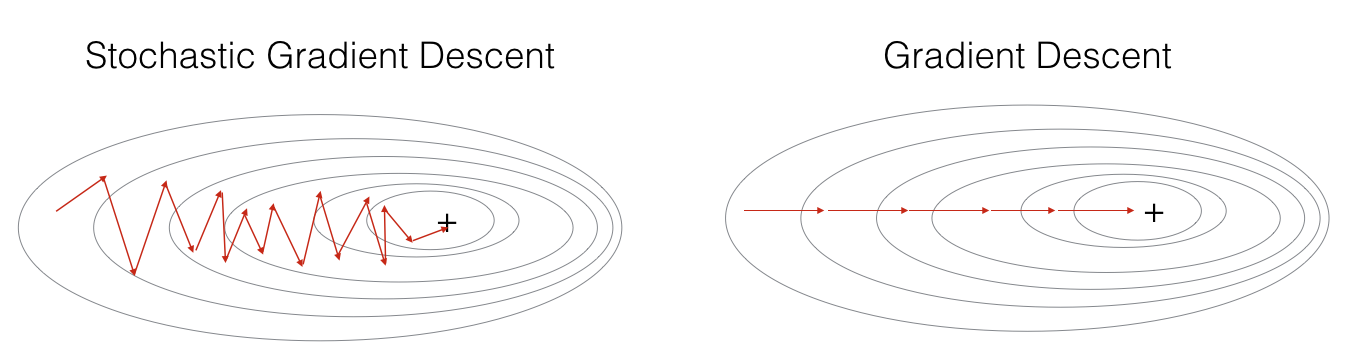

><font color=lightpink>Однако из-за таких скачков есть шанс пропустить и глобальный минимум функции потерь, если скачки будут слишком большими.</font>

Чтобы управлять шагами, как раз и существует параметр **темпа обучения**. Он позволяет управлять размером шага градиентного спуска.

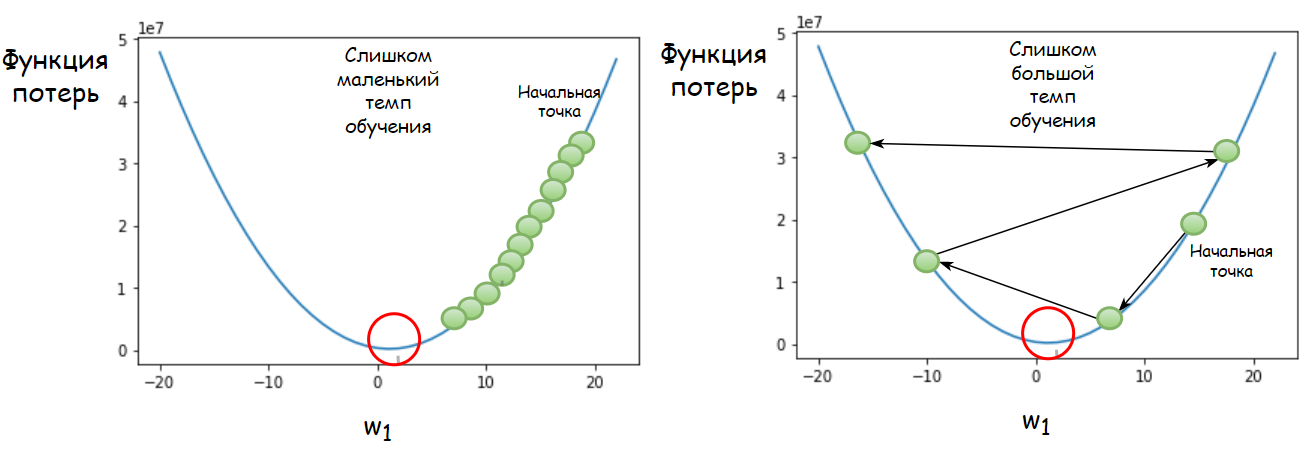

Будем брать большой шаг в начале обучения и уменьшать его постепенно, приближаясь к минимуму, чтобы не «выпрыгнуть» из точки минимума. Параметр  регулируется в процессе обучения — он уменьшается с ростом числа итераций по формуле:

$$ \eta_t = \frac{\eta_0}{t_p}$$

где $\eta_0$ - начальное значение темпа обучения, $p$ - мощность уменьшения темпа (задаётся пользователем).

Ещё один важный момент, на который стоит обратить внимание при работе с градиентным спуском — это обязательное **масштабирование факторов** (приведение факторов к единому масштабу или к единым статистическим характеристикам), если их несколько. Иначе в пространстве параметров функция ошибки становится очень растянутой по одной оси, но очень сжатой по другой, и найти её минимум будет очень сложно.